# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.619656e+01     1.560364e+01
 * time: 0.0015230178833007812
     1     3.245056e+01     7.424973e+00
 * time: 0.006674051284790039
     2     2.629908e+01     7.950143e+00
 * time: 0.011854887008666992
     3     2.090828e+01     1.956514e+00
 * time: 0.01687908172607422
     4     1.947419e+01     1.516120e+00
 * time: 0.022121906280517578
     5     1.934182e+01     1.923439e+00
 * time: 0.026504993438720703
     6     1.870817e+01     1.306499e+00
 * time: 0.03075408935546875
     7     1.829950e+01     1.320742e+00
 * time: 0.03511404991149902
     8     1.798527e+01     1.039529e+00
 * time: 0.03955411911010742
     9     1.783507e+01     8.454202e-01
 * time: 0.04373908042907715
    10     1.771665e+01     5.605580e-01
 * time: 0.04784107208251953
    11     1.760992e+01     9.642230e-01
 * time: 0.05118203163146973
    12     1.753616e+01     1.298686e+00
 * time: 0.054505109786987305
    13     1.743625e+01     8.516480e-01
 

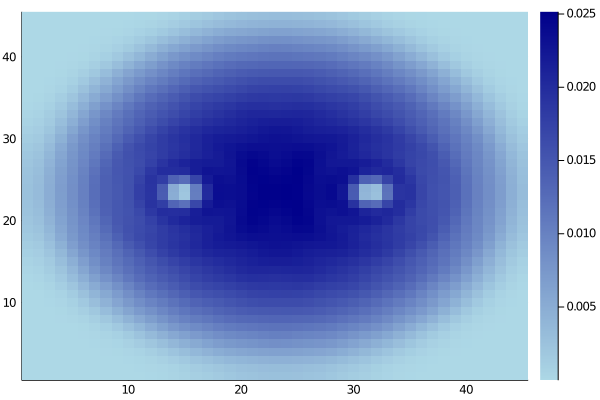

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)